In [17]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , roc_curve,plot_roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)
from matplotlib.patches import Patch
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [21]:
dataset = "C:\\Users\\Admin\\Desktop\\Dataset\\glaucoma_vs_non_glaucoma1.csv"
feature = ["cdr" , "label"]
glaucoma_data = pd.read_csv(dataset , names = feature)

#print(a)
skf = StratifiedKFold(n_splits=5)


Fold Number : 1 
Accuracy :  0.6279761904761905
Specificity :  0.7005347593582888
Sensitivity :  0.5369127516778524
Precision:  0.5882352941176471
F1-Score:  0.5614035087719298
FP:  56
FN:  69
TP:  80
TN:  131 

Fold Number : 2 
Accuracy :  0.5833333333333334
Specificity :  0.9732620320855615
Sensitivity :  0.09395973154362416
Precision:  0.7368421052631579
F1-Score:  0.16666666666666669
FP:  5
FN:  135
TP:  14
TN:  182 

Fold Number : 3 
Accuracy :  0.5684523809523809
Specificity :  0.9572192513368984
Sensitivity :  0.08053691275167785
Precision:  0.6
F1-Score:  0.14201183431952663
FP:  8
FN:  137
TP:  12
TN:  179 

Fold Number : 4 
Accuracy :  0.6339285714285714
Specificity :  0.7647058823529411
Sensitivity :  0.4697986577181208
Precision:  0.6140350877192983
F1-Score:  0.532319391634981
FP:  44
FN:  79
TP:  70
TN:  143 

Fold Number : 5 
Accuracy :  0.5773809523809523
Specificity :  0.6881720430107527
Sensitivity :  0.44
Precision:  0.532258064516129
F1-Score:  0.48175182481751827
F

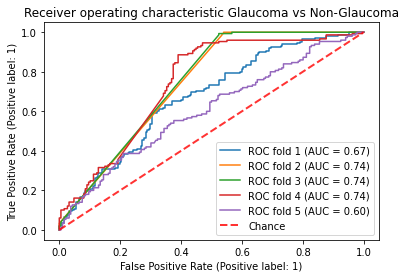

In [22]:
model = []
tprs = []
aucs = []
fold_no = 1
kernel = 1.0 * RBF(1.0)
mean_fpr = np.linspace(0, 1, 100)
i = 0
fig, ax = plt.subplots()
#knn_clf=KNeighborsClassifier(n_neighbors=2)
gpc = GaussianProcessClassifier(kernel=kernel,random_state=0)
#cdr2d = np.reshape(glaucoma_data[label != 1],(-1,1))
cdr2d = np.reshape(glaucoma_data.cdr.values,(-1,1))
label = glaucoma_data.label.values
trainData,testData,trainType,testType = train_test_split(cdr2d,label,test_size=0.2,random_state=100)
for train,test in skf.split(trainData,trainType):
    x_train = trainData[train]
    y_train = trainType[train]
    X_test = trainData[test]
    y_test = trainType[test]
    gpc.fit(x_train,y_train)
    
    ############# viz plot 
    viz = plot_roc_curve(gpc, X_test, y_test,
                         name='ROC fold {}'.format(fold_no),
                         ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    conf_matrix = confusion_matrix(y_test,gpc.predict(X_test))
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    Accuracy = (TP+TN)/(TP+FP+FN+TN)
    Specificity = TN/(TN+FP)
    sensitivity = TP / (TP + FN) ##recall
    Precision = TP / (TP+FP)
    F1 = 2*((Precision * sensitivity)/(Precision + sensitivity))
    print('Fold Number : %i ' %fold_no )
    print('Accuracy : ',Accuracy)
    print('Specificity : ',Specificity)
    print('Sensitivity : ',sensitivity)
    print("Precision: ",Precision )
    print("F1-Score: ", F1)
    
    print("FP: ",FP)
    print("FN: ",FN)
    print("TP: ",TP)
    print("TN: ",TN,'\n')
    fold_no += 1
    i += 1

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic Glaucoma vs Non-Glaucoma")
ax.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
data  = "C:\\Users\\Admin\\Desktop\\Dataset\\normal_vs_non_normal1.csv"

read = pd.read_csv(data)
df = pd.DataFrame(read)
count = 0
total = 0
for i in read.values:
    if(i[1] == 0 ) :
        count += 1
    total += 1
print(count)
print(total)


Fold Number : 1 
Accuracy :  0.625
Specificity :  0.8502673796791443
Sensitivity :  0.3422818791946309
Precision:  0.6455696202531646
F1-Score:  0.4473684210526316
FP:  28
FN:  98
TP:  51
TN:  159 

Fold Number : 2 
Accuracy :  0.5863095238095238
Specificity :  0.8983957219251337
Sensitivity :  0.19463087248322147
Precision:  0.6041666666666666
F1-Score:  0.29441624365482233
FP:  19
FN:  120
TP:  29
TN:  168 

Fold Number : 3 
Accuracy :  0.6130952380952381
Specificity :  0.8770053475935828
Sensitivity :  0.28187919463087246
Precision:  0.6461538461538462
F1-Score:  0.3925233644859813
FP:  23
FN:  107
TP:  42
TN:  164 

Fold Number : 4 
Accuracy :  0.6220238095238095
Specificity :  0.9037433155080213
Sensitivity :  0.2684563758389262
Precision:  0.6896551724137931
F1-Score:  0.3864734299516908
FP:  18
FN:  109
TP:  40
TN:  169 

Fold Number : 5 
Accuracy :  0.5952380952380952
Specificity :  0.8494623655913979
Sensitivity :  0.28
Precision:  0.6
F1-Score:  0.38181818181818183
FP:  28
FN

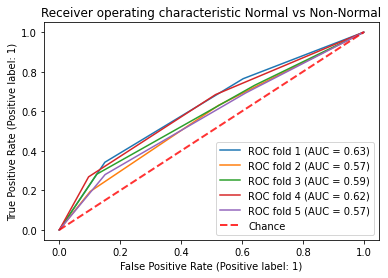

In [23]:
##### KNN
model = []
tprs = []
aucs = []
fold_no = 1
kernel = 1.0 * RBF(1.0)
mean_fpr = np.linspace(0, 1, 100)
i = 0
fig, ax = plt.subplots()
knn_clf=KNeighborsClassifier(n_neighbors=2)
#gpc = GaussianProcessClassifier(kernel=kernel,random_state=0)
#cdr2d = np.reshape(glaucoma_data[label != 1],(-1,1))
cdr2d = np.reshape(glaucoma_data.cdr.values,(-1,1))
label = glaucoma_data.label.values
trainData,testData,trainType,testType = train_test_split(cdr2d,label,test_size=0.2,random_state=100)
for train,test in skf.split(trainData,trainType):
    x_train = trainData[train]
    y_train = trainType[train]
    X_test = trainData[test]
    y_test = trainType[test]
    knn_clf.fit(x_train,y_train)
    
    ############# viz plot 
    viz = plot_roc_curve(knn_clf, X_test, y_test,
                         name='ROC fold {}'.format(fold_no),
                         ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    conf_matrix = confusion_matrix(y_test,knn_clf.predict(X_test))
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    Accuracy = (TP+TN)/(TP+FP+FN+TN)
    Specificity = TN/(TN+FP)
    sensitivity = TP / (TP + FN) ##recall
    Precision = TP / (TP+FP)
    F1 = 2*((Precision * sensitivity)/(Precision + sensitivity))
    print('Fold Number : %i ' %fold_no )
    print('Accuracy : ',Accuracy)
    print('Specificity : ',Specificity)
    print('Sensitivity : ',sensitivity)
    print("Precision: ",Precision )
    print("F1-Score: ", F1)
    
    print("FP: ",FP)
    print("FN: ",FN)
    print("TP: ",TP)
    print("TN: ",TN,'\n')
    
    fold_no += 1
    i += 1

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic Normal vs Non-Normal")
ax.legend(loc="lower right")
plt.show()

In [ ]:
conf_matrix = confusion_matrix(testType,knn_clf.predict(testData))

In [ ]:
conf_matrix = confusion_matrix(testType,knn_clf.predict(testData))
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
Accuracy = (TP+TN)/(TP+FP+FN+TN)
Specificity = TN/(TN+FP)
sensitivity = TP / (TP + FN)


print(Accuracy)
print(Specificity)
print(sensitivity)
print(conf_matrix)


In [ ]:
X = ['cdr']
y = ['label']
y

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X , y)
y_pred_proba = knn_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(x_test, y_test)
plt.plot(fpr,tpr,label="data 1, auc ="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
from sklearn.cross_validation import cross_val_score
cross_val_score(knn_cfs, trainData, trainType, cv=5)

In [ ]:
y_pred = knn_clf.predict([[0.7]])
y_pred[0]



In [ ]:
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.1, random_state = 0)
knn_clf.fit(X_train , y_train)
y_pred_proba = knn_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  X_test)
auc = metrics.roc_auc_score(y_test, X_test)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr,tpr,label=" AUC ="+str(auc))

plt.legend(loc=4)
plt.show()

In [ ]:
y_pred = knn_clf.predict(X)
y_pred
y_pred_proba = knn_clf.predict_proba(X_test)[:,1]
y_probas = m.predict_proba(X_test)

In [ ]:
FPR = FP/(FP+TN)
TPR = TP/(TP+FN)

x = FPR# false_positive_rate
y = TPR# true_positive_rate 

# This is the ROC curve
plt.scatter()
plt.plot(x,y)
plt.show() 


# This is the AUC
#auc = np.trapz(y,x)

In [ ]:
import scikitplot as skplt
import matplotlib.pyplot as plt
#y =np.reshape(y,(2045 ,2045 ))

y_true = y_test # ground truth labels
y_probas = y_pred_proba # predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc(y_true, y_probas)
plt.show()

In [ ]:
y_pred_proba

In [ ]:
y

In [ ]:
from sklearn import metrics
y_pred_proba = knn_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc ="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
conf_matrix = confusion_matrix(y,y_pred)
FP = conf_matrix(axis=0) - np.diag(confusion_matrix)  
FP

In [ ]:
kfold = 5
skf = StratifiedKFold(n_splits = kfold)

fold_no = 1
X = ['cdr']
y = ['label']


In [ ]:
def train_model(train, test,fold_no):
    x_train = train[X]
    y_train = train[y]
    X_test = test[X]
    y_test = test[y]
    knn_clf.fit(X_train,y_train)
    predictions = knn_clf.predict(X_test)
    print('Fold',str(fold_no),
         'Accuracy: ',
         accuracy_score(y_test,predictions))

In [ ]:
tprs = []
aucs = []
fold_no = 1
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
knn_clf=KNeighborsClassifier(n_neighbors=2)
#cdr2d = np.reshape(glaucoma_data[label != 1],(-1,1))
cdr2d = np.reshape(glaucoma_data.cdr.values,(-1,1))
label = glaucoma_data.label.values
trainData,testData,trainType,testType = train_test_split(cdr2d,label,test_size=0.2,random_state=1)
for train,test in skf.split(trainData,trainType):
    x_train = trainData[train]
    y_train = trainType[train]
    X_test = trainData[test]
    y_test = trainType[test]
    knn_clf.fit(x_train,y_train)
    ############# viz plot 
    viz = plot_roc_curve(knn_clf, testData, testType,
                         name='ROC fold {}'.format(fold_no),
                         ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
    conf_matrix = confusion_matrix(testType,knn_clf.predict(testData))
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    Accuracy = (TP+TN)/(TP+FP+FN+TN)
    Specificity = TN/(TN+FP)
    sensitivity = TP / (TP + FN)
    print('Fold Number : %i ' %fold_no )
    print('Accuracy : ',Accuracy)
    print('Specificity : ',Specificity)
    print('sensitivity : ',sensitivity,'\n')
    fold_no += 1

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance', alpha=.8)

ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example")
ax.legend(loc="lower right")
plt.show()


In [ ]:
x_train